# Tara Shift! A Comparison of Restricted Boltzmann Machine and Extreme Learning Machine Networks on an Imbalanced Dataset with High Cardinality Categorical Features

Submitted by: Ethan Robert A. Casin

## Executive Summary

For this project I introduced two new models that would be helpful in for future work and experimentation. Some of these networks have proven important in the history of neural networks. The models introduced are the Restricted Boltzmann Machine (RBM) and the Extreme Learning Machine (ELM). A benchmark neural network based on a customer churn model was created to determine how the model fairs with typical neural networks.

It was found that the typical neural network outperformed the generated networks by a fair amount. Technically, the models did beat the base $PCC$ of 62.57%, only the typical ANN beat the $1.25PCC$ value. What's interesting in this project was how well the ELM model performed with the short runtime. 

# Introduction

Before undertaking the MSDS program, I was reading some papers on neural networks. One was about the long history of their development and another about its critique. Naturally, the first network I learned was the perceptron. A really shallow network, which is relatively easier to understand than more advanced networks like GANs. In reading those articles, I was really interested in the Restricted Boltzmann Machine (RBM). In part because it uses a physics concept  and it was weird seeing it in a discussion on AI. From there, I really wanted to explore more about this network and other networks like it.

For this project, I want to know how effective the Restricted Boltzmann Machine and Extreme Learning Machine (ELM) networks in an imbalanced and highly categorical dataset. The goal here is to challenge and verify their effectiveness 
in datasets where ML1 concepts would suffice. For this purpose, I found a dataset in Kaggle centered on human resource analytics. 

The potential value of this project is mostly for learning. Learning about these two models and how they are implemented in a typical work-flow. Moreover, these models were quite the conversation starters before with some of them being used for commercial applications. The networks here are building blocks of more advanced recommender systems or even embedded devices. Knowing these models may help us understand why we choose newer models, and it would help us give a background if the time comes that research were to go back to these models.

## Theoretical Background

Since the models are new, I thought it would be appropriate to give a quick conceptual background on how these two work. 

### Restricted Boltzmann Machine

Restricted Boltzmann Machines (RBMs) are stochastic generative models that are able to learn the probability distribution of certain inputs. Since it is a stochastic model, each neuron will behave randomly when it is activated. The figure below is an example of a simple RBM model.

<img src="https://miro.medium.com/max/1760/1*De0RDPU_XRqT0BMAVE4vqA.png" width=650em></img>
<font size=1em>Image src: https://towardsdatascience.com/deep-learning-meets-physics-restricted-boltzmann-machines-part-i-6df5c4918c15</font>

The steps involved with RBMs are quite similar to typical neural networks: conduct a feed forward pass, then do backpropagation. To give a bit more of an idea, I will walk you through the learning process of an RBM, but it will not be as detailed as [1, 3]. 

First we do a forward pass on a model, where we multiply the inputs with their corresponding weights and add the bias.  The result of this will be passed to a sigmoid function, which will determine if the hidden state gets activated or not. 

<img src="https://wiki.pathmind.com/images/wiki/multiple_inputs_RBM.png" width=450em></img>
<font size=1em>Image src: https://wiki.pathmind.com/restricted-boltzmann-machine</font>

The above image displays how the forward pass is done. Mathematically, the result should follow the equation

$$\mathbf{h}^{(1)} = g(\mathbf{v}^{(0)T}w + b),$$

where $\mathbf{h}^{(0)}$ and $\mathbf{v}^{(0)}$ are the vectors for the hidden and visible layers, respectively. This looks similar to a standard feed-forward formula with weights $w$, bias $b$, and activation function $g(\cdot)$. Note that in this case the activation function is a sigmoid function. Note that the superscripts are the iteration number.

We then do a backward pass called the **reconstruction phase**. This phase turns the hidden layer output on the forward pass into inputs for the reconstruction phase. An image below shows how this would look like visually.

<img src="https://wiki.pathmind.com/images/wiki/reconstruction_RBM.png" width=450em></img>
<font size=1em>Image src: https://wiki.pathmind.com/restricted-boltzmann-machine</font>

Mathematically, the reconstruction phase becomes

$$\mathbf{v}^{(1)} = g(\mathbf{h}^{(1)}w^T + b),$$

where $\mathbf{v}^{(1)}$ and $\mathbf{h}^{(1)}$ are the vectors for the visible and hidden layers, respectively. Since the weights of an RBM are randomly set, the difference between reconstructions and the original input can be quite large. We can think of this as the reconstruction error that we need to minimize during training.

$$\mathbf{v}^{(0)} - \mathbf{v}^{(1)}$$

We also saw that on the forward pass that the RBM uses the inputs to predict if the nodes will be activated, or the probability for output $\mathbf{h}^{(1)}$ given $\mathbf{v}^{(0)}$ and then weights $w$.

$$p(\mathbf{h}^{(1)}|\mathbf{v}^{(0)}; w)$$

Similarly, we are calculating the probability of the output $\mathbf{v}^{(1)}$ given $\mathbf{h}^{(1)}$ and $w$ for the backward pass. 

$$p(\mathbf{v}^{(1)}|\mathbf{h}^{(1)}; w)$$

This would leave us with a joint probability for the inputs and activations, given by

$$p(\mathbf{v}, \mathbf{h}).$$

#### Learning Rule

RBMs are also energy-based models. Therefore, RBMs, with a joint condition of $(\mathbf{v}, \mathbf{h})$, has the energy

$$E(\mathbf{v}, \mathbf{h}) = -\sum_{i\in \text{visible}} a_iv_i - \sum_{j\in \text{hidden}}b_jh_j - \sum_{ij}v_ih_jw_{ij},$$

where $v_i,\ h_i$ are the binary states of the visible unit $i$ and hidden unit $j$, $a_i,\ b_j$ are the biases and $w_{ij}$ is the weight between the visible and hidden nodes. 

The probability that the network assigns to a visible vector, $v$, is the sum over all possible hidden vectors

$$p(\mathbf{v}) = \frac{1}{Z}\sum_{\mathbf{h}}e^{-E(\mathbf{v}, \mathbf{h})},$$

where $Z$ is a partition function. $Z$ is found by getting the sum over all possible pairs of visible and hidden vectors, defined as

$$Z = \sum_{\mathbf{v}, \mathbf{h}}e^{-E(\mathbf{v}, \mathbf{h})}.$$

The log-likelihood gradient of a training vector with respect to a weight $w_{ij}$ is

$$\frac{\partial \log p(\mathbf{v})}{\partial w_{ij}} = \langle v_ih_j\rangle_{\text{data}} - \langle v_ih_j\rangle_{\text{model}},$$

where the angle brackets denote the expectations under the distribution specified. Therefore, the learning rule now becomes

$$\Delta w_{ij} = \alpha(\langle v_ih_j\rangle_{\text{data}} - \langle v_ih_j\rangle_{\text{model}}), $$

where $\alpha$ is the learning rate. Since an RBM does not give classification inputs, it is often used to determine a feature vector that is used to train a classifier. Therefore, an RBM is placed before a classifier in this study.

### Extreme Learning Machine

Compared to typical neural networks, ELMs don't require backpropagation to learn the weights. Instead, an ELM learns by using the Moore-Penrose generalized inverse to function. Because it does not require backpropagation, ELMs are generally faster to train while observing good performance. The image below is a schematic diagram of an ELM.

<img src="https://www.researchgate.net/publication/324117237/figure/fig2/AS:610052247396352@1522459198029/The-schematic-diagram-of-extreme-learning-machine-ELM.png" width=650em></img>
<font size=1em>Image src: https://www.researchgate.net/figure/The-schematic-diagram-of-extreme-learning-machine-ELM_fig2_324117237</font>

An ELM computes its output based on the formula

\begin{equation*}
f_L = \sum^L_{i=1}\beta_ig_i(w_i\cdot x_j + b_i),
\end{equation*}

where $L$ is the number of hidden units, $j = 1,\dots,N$, where $N$ is the number of training samples, $w_i$ is a weight vector between input and hidden layer, $g$ is an activation function, $b_i$ is a bias vector, $x_j$ is an input vector, and $\beta_i$ is the weight vector between hidden and output layers. 

This formula can be simplified further into a target matrix $T$ and a hidden layer output matrix $H$

$$T = H\beta.$$

$H$ is defined as a matrix that contains the outputs of the activation functions in the hidden layer. In matrix form:

\begin{equation*}
H = \begin{bmatrix}
g(w_1\cdot x_1 + b_1) & \dots & g(w_L\cdot x_1 + b_L)\\
\vdots & \ddots & \vdots\\
g(w_1\cdot x_N + b_1) & \dots & g(w_L\cdot x_N + b_L)
\end{bmatrix}
\end{equation*}

Without going further with the mathematical formulation, we can solve for $\beta$ by following the formula of the Moore-Penrose inverse.

$$\hat{\beta} = H^\dagger T$$

Once $\hat{\beta}$ is solved, we can now use this to predict for the outputs of new data. For further proofs, I refer you to [2].

$$T = H\hat{\beta}$$

# Methodology

In conducting this study, the following methods were done: 1) pre-processing, 2) model creation, and 3) model evaluation. Note that the results here were already retrieved from a grid-search on a previous notebook. This section contains a description of the dataset, pre-processing, and an overview of the target value counts.  

In [105]:
# general workflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, KFold,
                                     cross_val_score)
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import clone
from sklearn.decomposition import PCA
import warnings

# typical models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier)

# metrics
from sklearn.metrics import (roc_curve, roc_auc_score, recall_score, 
                             confusion_matrix, balanced_accuracy_score,
                             accuracy_score, precision_score,
                             classification_report)

# neural networks
from sklearn.neural_network import BernoulliRBM
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras import Sequential
from tensorflow.keras import layers, activations
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.utils.vis_utils import plot_model

# import self defined ELM and helper functions
from elm import ELM
from helpers import * 

%matplotlib inline

In [109]:
def kfold_cv(X, y, k_neighbors=5, model=None, n_splits=3,
             activation_function='relu', random_state=42): 
    """Performs oversampling and K-Fold cross-validation. Oversampling is done
    for each fold to avoid bleeding out information. Improper oversampling can
    result to higher percieved accuracies. 
    
    To validate results, the AUC-ROC and the Recall must be shown. Moreover,
    the balanced accuracy must always be close to the AUC-ROC value. 
    
    Parameters:
    -----------
    X : array-like
        Input data. Preferably the entire dataset
    y : array-like
        Targets. 
    k_neighbors : int
        Number of k neighbors in conducting SMOTE. Default is 5.
    model : object-like, estimator
        Machine learning model to be used. Default is a Logistic Regression
        with random_state
    n_splits : int
        Number of K-Fold splits for cross validation. The higher the number, 
        the longer the runtime. Recommended values are in the range [3, 5].
    activation_function : string
        Activation function for the ELM model
    random_state : int
        Random state for cross-validation
    
    Returns:
    --------
    acc_mean : float
        Average (unbalanced) accuracy of the model
    bal_acc_mean : float
        Average balanced accuracy of the model
    auc_mean : float
        Average AUC-ROC of the model
    recall_mean : float
        Average recall of the model
    """
    # convert inputs to array
    X = np.array(X)
    y = np.array(y)
    
    # initialize smote
    smote = SMOTE(sampling_strategy='minority', k_neighbors=k_neighbors)
    
    # create placeholders
    auc = []
    recall = []
    accuracy = []
    bal_accuracy = []
    oo_fold = np.zeros(len(X))

    # initialize cross validation
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # begin operation
    for fold, (train_idx, val_idx) in enumerate(folds.split(X, y)):
        print(f'Fold: {fold + 1} -> Starting...')
        
        # retrieve train and validation sets
        train_data, val_data = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        # oversample training data
        train_upsample, y_upsample = smote.fit_resample(train_data, y_tr)
        
        # fit oversampled data to models
        if model is None: # check for input models
            model = GaussianNB()
            model.fit(train_upsample, y_upsample)
            oo_fold[val_idx] = model.predict_proba(val_data)[:, 1]
        else: # if the model is an ELM
            model.fit(train_upsample, y_upsample, activation_function)
            oo_fold[val_idx] = model.predict(val_data)

        
        # compute metrics
        # convert outputs into binary; some are floats
        aucrec = roc_auc_score(y_val, np.where(oo_fold[val_idx] > 0.5, 1, 0))
        rec = recall_score(y_val, np.where(oo_fold[val_idx] > 0.5, 1, 0))
        acc = accuracy_score(y_val, np.where(oo_fold[val_idx] > 0.5, 1, 0))
        bal_acc = balanced_accuracy_score(
            y_val, np.where(oo_fold[val_idx] > 0.5, 1, 0))
        
        # print results for each fold
        print(f'Accuracy: {acc}')
        print(f'Balanced Accuracy: {bal_acc}')
        print(f'Validation AUC-ROC: {aucrec}')
        print(f'Validation Recall: {rec}')
        
        # append results from each fold
        accuracy.append(acc)
        bal_accuracy.append(bal_acc)
        auc.append(aucrec)
        recall.append(rec)

    # get the average values of the metrics
    auc_mean = np.mean(auc)
    acc_mean = np.mean(accuracy)
    recall_mean = np.mean(recall)
    bal_acc_mean = np.mean(bal_accuracy)
    
    # print the average results
    print('=' * 40)
    print(f'Model Average Accuracy: {acc_mean}')
    print(f'Model Average Balanced Accuracy: {bal_acc_mean}')
    print(f'Model Average AUC-ROC: {auc_mean}')
    print(f'Model Average Recall: {recall_mean}')
    return acc_mean, bal_acc_mean, auc_mean, recall_mean


## Description of the Dataset

For this project, I wanted to use a different dataset, which could be used for actual projects and applications. Instead of relying to benchmark datasets, such as the MNIST image dataset, I chose the *HR Analytics: Job Change of Data Scientists* from Kaggle. Here is a [link](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists) to the actual dataset.

The data source contains two files: one for training and one for testing. However, the test dataset has no labels to it, so to check the model performance the training set was used as the overall dataset. Moreover, it contains about 33k rows and most of the features are categorical. Some of these features are ordinal and were mapped accordingly. Below is a summary table of the features and their descriptions.


|Feature|Description|
|---|---|
|`enrollee_id`| Unique ID for candidate|
|`city`| City code|
|`city_development_index`| Development index of the city (scaled)|
|`gender`| Gender of the candidate|
|`relevant_experience`| Relevant experience of the candidate|
|`enrolled_university`| Type of University course enrolled if any|
|`education_level`| Education level of candidate|
|`major_discipline`| Education major discipline of the candidate|
|`experience`| Candidate total experience in years|
|`company_size`| Number of employees in current employer's company|
|`company_type`| Type of current employer|
|`last_new_job`| Difference in years between previous job and current job|
|`training_hours`| Training hours completed|
|`target`| 0 - Not looking for job change, 1 - looking for job change |


## Pre-processing

In preprocessing the data, I used a helper function called `cleaner` to do this. I put the function in a python script to make this report cleaner. There are some ordinal features, such as `relevant_experience`, `enrolled_university`, and more. These ordinal features were mapped accordingly. Moreover, some features whose order are non-existent or vague are one-hot encoded. These features are `city`, `gender`,`major_discipline`, and more. Doing this may avoid biasing the analysis and the model.

In [50]:
train = pd.read_csv('aug_train.csv')

eda_df = train.copy() # get a copy of the raw data for EDA

# clean dataset
cleaner(train)

# one hot encode
cols = ['city', 'gender', 'enrolled_university', 'major_discipline',
        'company_type']
train = pd.get_dummies(train, columns=cols).iloc[:, 1:]
target = train.pop('target')


# scale the data
scaler = MinMaxScaler()
train_ = scaler.fit_transform(train)

# split into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    train_, target, stratify=target, test_size=.25, random_state=42)

The data is then scaled in the range [0, 1] to make the training time faster and it is also a requirement for the RBM to function properly. Then a 75-25 split was done on the scaled data. 

## Overview of the Targets

To understand the dataset a bit more, I displayed a count plot of the targets below. We see that 0 or *Not looking for job change* has more than 14k counts. Down-sampling would reduce the dataset to about 5k data points, which is undesirable for neural networks. That is why oversampling is the preferred method here.

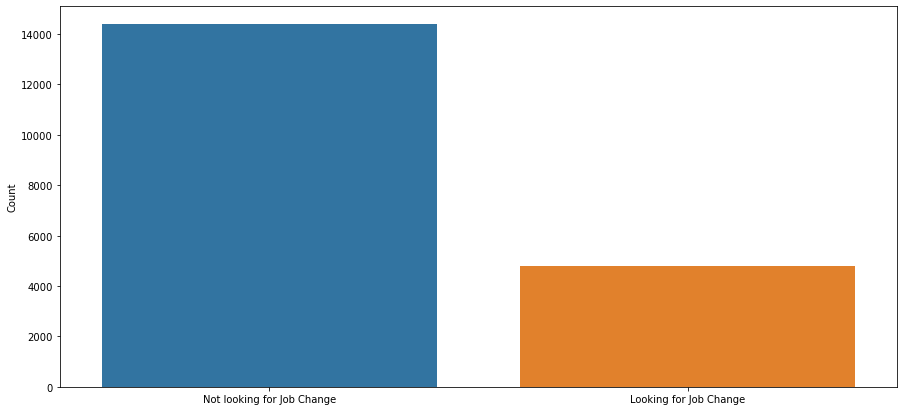

In [48]:
counts = target.value_counts()

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Not looking for Job Change', 'Looking for Job Change'])
ax.set_ylabel('Count');

# Results and Discussion

This section is composed of 1) the baseline neural network, the RBM networks, and the ELM network. Further, an evaluation of the models will be done at the latter part of this section. The models will be checked if they outperform the naive method with cross-validation and oversampling, and if the models surpass the 1.25 Proportion Chance Criterion ($PCC$).

## Baseline Neural Network

To have a good foothold, we will be using a baseline neural network. This network architecture is based on a customer churn model, with a few tweaks on the parameters. This is to test if the RBM and ELM networks could outperform a baseline neural network for this dataset. 

,Average Accuracy,Average AUC-ROC
Train,79.03,78.79
Validation,78.66,80.02


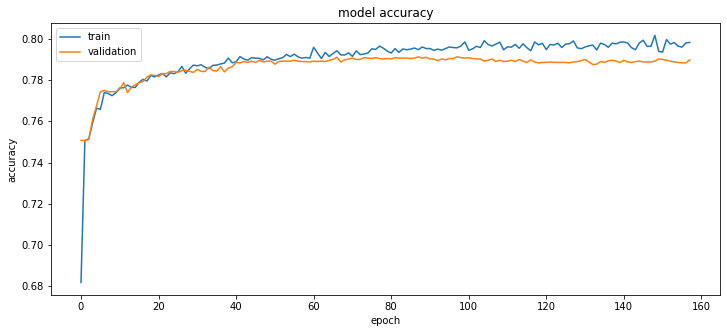

In [75]:
# create a learning rete decay schedule
# for every 50 epochs, the learning rate will be half than the learning rate
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.0001, decay_steps=(x_train.shape[0] / 32) * 50, decay_rate=1,
    staircase=False)

# create model
bench_model = Sequential()
bench_model.add(Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                      input_dim=x_train.shape[1], activation='relu'))
bench_model.add(Dropout(rate=0.2)) # avoids overfitting
bench_model.add(Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.0001),
                      activation='relu'))
bench_model.add(Dropout(rate=0.1))
bench_model.add(Dense(1, activation='sigmoid'))

# compile the model
bench_model.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(lr_schedule),
                    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# fit the model
bench_hist = bench_model.fit(x_train, y_train, validation_data=(x_val, y_val),
                             epochs=200, batch_size=32,
                             callbacks=get_callbacks(), verbose=0)

# evaluate
bench_trainacc = bench_hist.history['accuracy']
bench_valacc = bench_hist.history['val_accuracy']
bench_trainauc = bench_hist.history['auc']
bench_valauc = bench_hist.history['val_auc']

# average accuracy of the model
bench_mtacc = round(np.mean(bench_trainacc)* 100, 2)
bench_mvacc = round(np.mean(bench_valacc) * 100, 2)

# average auc of the model
bench_mtauc = round(np.mean(bench_trainauc) * 100, 2)
bench_mvauc = round(np.mean(bench_valauc) * 100, 2)

display(pd.DataFrame([[bench_mtacc, bench_mtauc], [bench_mvacc, bench_mvauc]],
                     columns=['Average Accuracy', 'Average AUC-ROC'],
                     index=['Train', 'Validation']))

plt.figure(figsize=(12, 5))
plt.plot(bench_trainacc)
plt.plot(bench_valacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can see that the average accuracy of the model does not surpass the 79% mark. However, the average AUC-ROC of the model touched above 80% (at the time of writing). Since the dataset is imbalanced, the primary metric to be checked would be the AUC-ROC. Note that the validation accuracy is above the train accuracy because of the dropout layers included. 

The figure below is a visualization of the model architecture. 

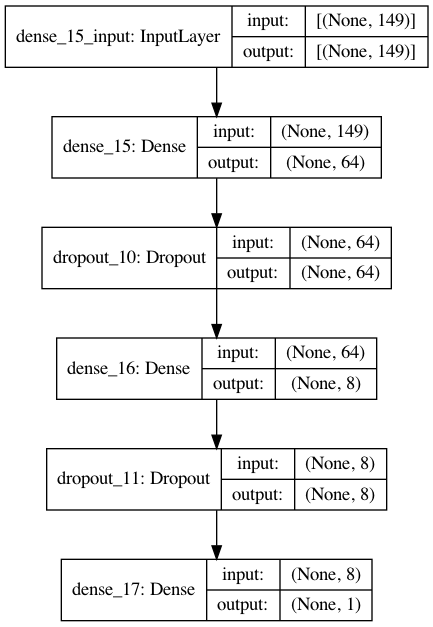

In [73]:
plot_model(bench_model, show_shapes=True, show_layer_names=True)

## RBM Networks

Let us now discuss the RBM networks created. The reason why Logistic Regression and Gradient Boosting Method (GBM) were the classifiers used was because of initial testing not present in this notebook. These classifiers gave the best benchmark scores with no over-fitting. 

Here we will compare two things for each network: one without SMOTE and one with SMOTE in the pipeline. Implementation-wise, I used a pipeline to connect the output of the RBM to the input of the classifier. This makes the implementation almost done in one line. 

### RBM and Logistic Regression

We will first begin with the RBM with Logistic Regression. Here we will check the performance of the RBM + Logistic Regression model without the presence of any oversampling. The parameters present here were found via grid search in a previous notebook. 

In [95]:
# initialize models
lr_base = LogisticRegression(random_state=42, C=0.1, max_iter=5000)
rbm_base = BernoulliRBM(n_components=256, learning_rate=0.1,
                        random_state=42, verbose=0, n_iter=10)

# create pipeline
base_pipe = Pipeline(steps=[('rbm', rbm_base), ('logistic', lr_base)])

# Cross validation
auc_base = cross_val_score(base_pipe, train_, target, scoring='roc_auc', cv=3)

print(f'Average AUC-ROC: {np.mean(auc_base):.4f}')

Average AUC-ROC: 0.7361


From the result above, we can see that the average AUC-ROC of the model is about 0.73. It was also found that even with oversampling in the pipeline for this network, the increase in the accuracy is negligible.

In [94]:
# with smote in pipeline
lr_smote = LogisticRegression(random_state=42, C=0.1, max_iter=1000)
rbm_smote = BernoulliRBM(n_components=256, learning_rate=0.1,
                        random_state=42, verbose=0, n_iter=10)
smote = SMOTE(random_state=42)

# create pipeline
smote_pipe = make_pipeline(rbm_smote, smote, lr_smote)
smote_score = cross_val_score(smote_pipe, train_, target, 
                              scoring='roc_auc', cv=3)

print(f'Average AUC-ROC: {np.mean(smote_score):.4f}')

Average AUC-ROC: 0.7387


### RBM and GBM

The next set of networks are RBMs with Gradient Boosting Method (GBM) models. These models take a longer time to train than the previous models, because of the GBM. Similar to the previous network, I compared the network with and without oversampling in the pipeline. 

In [97]:
# parameters were found from grid search

gbm_base = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200,
                                       random_state=42)
rbm_gbm_base = BernoulliRBM(learning_rate=0.1, n_components=256,
                             random_state=42, verbose=0, n_iter=100,
                             batch_size=50)
# create pipeline
gbmbase_pipe = Pipeline(steps=[('rbm', rbm_gbm_base), ('gbm', gbm_base)])

base_gbmacc = cross_val_score(gbmbase_pipe, train_, target, 
                              scoring='roc_auc', cv=3)

print(f'Average AUC-ROC: {np.mean(base_gbmacc):.4f}')

Average AUC-ROC: 0.7702


In [98]:
gbm_smote = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                       random_state=42)
rbm_gbm_smote = BernoulliRBM(learning_rate=0.1, n_components=256,
                             random_state=42, verbose=0, n_iter=100,
                             batch_size=50)
smote = SMOTE(random_state=42)

gbmsmote_pipe = make_pipeline(rbm_gbm_smote, smote, gbm_smote)


smote_gbm_score = cross_val_score(gbmsmote_pipe, train_, target,
                           scoring='roc_auc', cv=3)
print(f'Average AUC-ROC: {np.mean(smote_gbm_score):.4f}')

Average AUC-ROC: 0.7707


## Extreme Learning Machine

In this discussion, an extreme learning machine will be created. ELMs are fast and have a good performance. Since there are no packages that have ELMs, I decided to create one using NumPy based on [this implementation](https://towardsdatascience.com/build-an-extreme-learning-machine-in-python-91d1e8958599). Since I can't use the `cross_val` function on this model, I had to oversample the training data to be able to tune it properly. Below is the implementation of this process

,Average Values
Accuracy,0.757307
AUC-ROC,0.743594


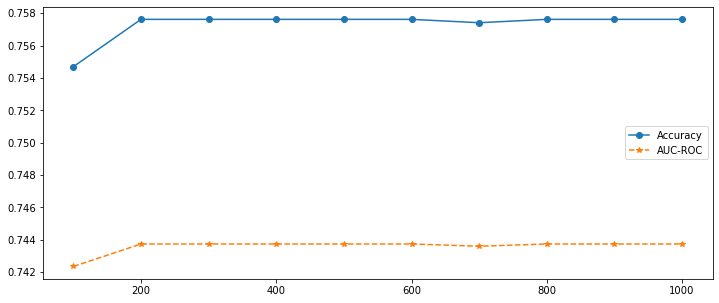

In [126]:
# oversample the training data
x_up, y_up = SMOTE(random_state=42).fit_resample(x_train, y_train)

# initialize placeholders
acc = []
auc = []
rec = []
node_range = range(100, 1100, 100) # create range for hidden nodes

# get accuracies for each number of hidden nodes
for hnodes in node_range:
    elm = ELM(x_up.shape[1], hnodes)
    elm.fit(x_up, y_up, 'relu')
    prediction = np.rint(elm.predict(x_val)) # convert into integers

    acc.append(accuracy_score(y_val, prediction))
    auc.append(roc_auc_score(y_val, prediction))
    
mean_acc = np.mean(acc)
mean_auc = np.mean(auc)
display(pd.DataFrame([mean_acc, mean_auc], 
                     columns=['Average Values'], 
                     index=['Accuracy', 'AUC-ROC']))

plt.figure(figsize=(12, 5))
plt.plot(node_range, acc, label='Accuracy', linestyle='-', marker='o')
plt.plot(node_range, auc, label='AUC-ROC', linestyle='--', marker='*')
plt.legend()
plt.show()

Here we see that 400 nodes have the highest accuracies so far. I already checked other ranges, but found that the range from 100 to 1000 is the best. Anything outside this range gains measures less than 70% for some reason. Since the weights and biases are randomly set and no backpropagation is being used, we can create oversampling and cross validation to check its robustness and generalizability. 

In [127]:
acc, bal_acc, auc, rec=  kfold_cv(train_, target, 
                                  model=ELM(train_.shape[1], 200), 
                                  activation_function='relu', n_splits=3)


Fold: 1 -> Starting...
Accuracy: 0.7586908863138114
Balanced Accuracy: 0.7374360913188891
Validation AUC-ROC: 0.7374360913188891
Validation Recall: 0.6941538461538461
Fold: 2 -> Starting...
Accuracy: 0.7577513310366426
Balanced Accuracy: 0.7393597676188511
Validation AUC-ROC: 0.7393597676188511
Validation Recall: 0.7029077117572693
Fold: 3 -> Starting...
Accuracy: 0.7505480739116818
Balanced Accuracy: 0.7328693368178258
Validation AUC-ROC: 0.7328693368178258
Validation Recall: 0.6980891719745222
Model Average Accuracy: 0.755663430420712
Model Average Balanced Accuracy: 0.7365550652518552
Model Average AUC-ROC: 0.7365550652518552
Model Average Recall: 0.6983835766285459


From there we can see that the ELM model is quite stable at about 73% accuracy. Given its speed, this model is quite impressive in its performance. A likely application of this model is to become a benchmark, or even as a main model for mobile applications. The main drawback may be its interpretability.

## Evaluation

If we were to evaluate the models, we must first establish the PCC as a benchmark. As a heuristic, we use the $1.25PCC$ to evaluate if the model performs well. We can see below that the values are 62.57% and 78.21% for $PCC$ and $1.25PCC$, respectively.

In [122]:
tot = target.value_counts().sum()
items = target.value_counts()

pcc = (items[0] / tot)**2 + (items[1] / tot)**2
print(f'PCC = {pcc * 100:.2f}%')
print(f'1.25PCC = {1.25*pcc * 100:.2f}%')

PCC = 62.57%
1.25PCC = 78.21%


A summary table below shows the model accuracies after cross validation and their runtimes.

|Model|Accuracy|Total Runtime|
|---|---|---|
|Benchmark ANN| 80.02%| 52.8s|
|RBM + Logistic Regression| 73.61%|20.07s|
|RBM + SMOTE + Logistic Regression| 73.87%|22.7s|
|RBM + GBM | 77.02%| 10m 1s|
|RBM + SMOTE + GBM| 77.07%| 8m 9s|
|ELM (ReLu 200)| 73.66%| 3.38s|

The generated RBM and ELM networks still underperformed compared to the benchmark ANN created. Impressive still is ELM for its performance with the short runtime. I also note that both of these networks may not have surpassed the $1.25PCC$, they did perform better than the base $PCC$ value. Which may not be that bad if we are considering the difficulty of the dataset used. 

# Conclusion and Recommendation

To summarize this study, I learned that tuning an RBM network is difficult. It takes a bit of time to train, since these are essentially two models stacked together. Moreover, an ELM network performs well especially if we consider how short the runtime is for it to learn the weights. All in all, these models seem to underperform when compared to the benchmark ANN used for this study, but it may not always be the case for certain tasks.

To improve this study I recommend using a different pre-processing method. Maybe the results were highly skewed by the methodology used. Maybe instead of over-sampling, we may under-sample using Tomek links. It might also be interesting to use the deep-learning counterparts of these models, namely Deep Belief Network and Deep Extreme Learning Machines. These are known to have a better performance than their shallow-counterparts.

This study was important for me to practice and learn new methods and models, which I may apply in many problems. For me, it is good to know where we had been for us to know where we are going. 

# References


[1] Sharma, A. (2018, December 06). Restricted Boltzmann Machines - Simplified. Retrieved January 18, 2021, from https://towardsdatascience.com/restricted-boltzmann-machines-simplified-eab1e5878976

[2] A Beginner's Guide to Restricted Boltzmann Machines (RBMs). (n.d.). Retrieved January 18, 2021, from https://wiki.pathmind.com/restricted-boltzmann-machine

[3] Erdem, K. (2020, May 29). Introduction to Extreme Learning Machines. Retrieved January 18, 2021, from https://towardsdatascience.com/introduction-to-extreme-learning-machines-c020020ff82b
